In [152]:
import numpy as np
import math 
from matplotlib import pyplot as plt


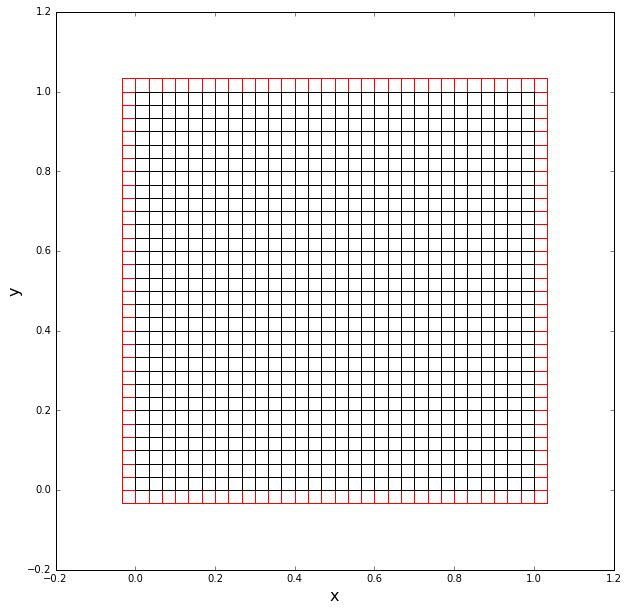

In [153]:
Nx = 30
Ny = 30

Lx = 1.0
Ly = 1.0

dx = Lx/(Nx)
dy = Ly/(Ny)

x_start,x_end = 0.0-dx,Lx+dx
y_start,y_end = 0.0-dy,Ly+dy

y = np.linspace(y_start,y_end,Ny+3)
x = np.linspace(x_start,x_end,Nx+3)
X,Y= np.meshgrid(x,y)

%matplotlib inline
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start-dx, x_end+dy)
#plt.ylim(y_start-dy, y_end+dy)
plt.plot(X,Y,color='red')
plt.plot(X.T,Y.T,color='red')
plt.plot(X[1:-1,1:-1], Y[1:-1,1:-1],color='black')
plt.plot(X[1:-1,1:-1].T, Y[1:-1,1:-1].T,color='black')
plt.plot(X[0,:], Y[0,:],color='red')
plt.plot(X[-1,:], Y[-1,:],color='red')
plt.plot(X[:,0], Y[:,0], color='red')
plt.plot(X[:,-1], Y[:,-1],color='red')



[-0.01666667  0.01666667  0.05        0.08333333  0.11666667  0.15
  0.18333333  0.21666667  0.25        0.28333333  0.31666667  0.35
  0.38333333  0.41666667  0.45        0.48333333  0.51666667  0.55
  0.58333333  0.61666667  0.65        0.68333333  0.71666667  0.75
  0.78333333  0.81666667  0.85        0.88333333  0.91666667  0.95
  0.98333333  1.01666667]
[-0.01666667  0.01666667  0.05        0.08333333  0.11666667  0.15
  0.18333333  0.21666667  0.25        0.28333333  0.31666667  0.35
  0.38333333  0.41666667  0.45        0.48333333  0.51666667  0.55
  0.58333333  0.61666667  0.65        0.68333333  0.71666667  0.75
  0.78333333  0.81666667  0.85        0.88333333  0.91666667  0.95
  0.98333333  1.01666667]


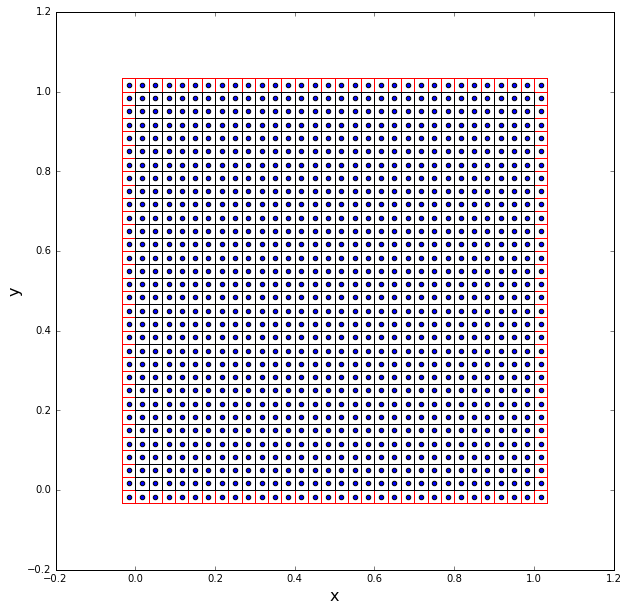

In [154]:
xc = np.linspace(0.,0.,Nx+2) 

for i in range (Nx+2):
    xc[i] = (x[i]+x[i+1])/2

yc = np.linspace(0.,0.,Ny+2)
    
for j in range (Ny+2):
    yc[j] = (y[j]+y[j+1])/2

print (xc)
print (yc)


Xc,Yc= np.meshgrid(xc,yc)


plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.scatter(Xc,Yc)


#plt.xlim(x_start-dx, x_end+dy)
#plt.ylim(y_start-dy, y_end+dy)
plt.plot(X,Y,color='red')
plt.plot(X.T,Y.T,color='red')
plt.plot(X[1:-1,1:-1], Y[1:-1,1:-1],color='black')
plt.plot(X[1:-1,1:-1].T, Y[1:-1,1:-1].T,color='black')
plt.plot(X[0,:], Y[0,:],color='red')
plt.plot(X[-1,:], Y[-1,:],color='red')
plt.plot(X[:,0], Y[:,0], color='red')
plt.plot(X[:,-1], Y[:,-1],color='red')


# Jacobi Method

In [155]:
counter = 0
n=1.0
u=np.zeros((Nx+2,Ny+2),dtype=float)
c=0

while (counter<5000):

    uold = u.copy()
    
    for i in range(1,Nx+1):
        for j in range (1,Ny+1):
            u[i,j]= (8*(math.pi*math.pi)*(n**2)*(math.cos(2*math.pi*n*xc[i]))*(math.cos(2*math.pi*n*yc[j]))*(dy**2)*(dx**2)+uold[i+1,j]*(dy**2)
                    +uold[i-1,j]*(dy**2)+uold[i,j+1]*(dx**2)+uold[i,j-1]*(dx**2))/(2*(dx**2+dy**2))
    for j in range(Ny+2):
         u[0,j]= 2*(math.cos(2*math.pi*n*x[1])*(math.cos(2*math.pi*n*yc[j])))-uold[1,j]
    
    for i in range(Nx+2):
        u[i,0]= uold[i,1]-c*dy

    for j in range(Ny+2):
        u[Nx+1,j]= uold[Nx,j]+c*dx
    
    for i in range(Nx+2):
        u[i,Ny+1]= uold[i,Ny]+c*dy
    
    if np.linalg.norm(uold-u)<10**-6:
        break
    

    counter = counter + 1
    
print (counter)


4599


In [156]:
u_an=np.zeros((Nx+2,Ny+2),dtype=float)

for i in range(0,Nx+2):
    for j in range (0,Ny+2):
        u_an[i,j] = math.cos(2*math.pi*n*xc[i])*(math.cos(2*math.pi*n*yc[j]))
        


In [157]:
Er =  (np.linalg.norm(u-u_an))
print (Er)

0.069761848861


In [158]:
# Nx = 30, Ny = 30
n1 = [1.0,1.5,2.0,2.5]
Er1= [0.069,0.1536,0.2706,0.4213]
convergence1 = [3000,3000,2706,3000]

In [159]:
# Nx = 50, Ny = 50
n2 = [1.0,1.5,2.0,2.5]
Er2= [0.0406,0.0867,0.1523,0.2365]
convergence2 = [5000,5000,5000,5000]

In [170]:
# Nx = 80, Ny = 80
n3 = [1.0,1.5,2.0,2.5]
Er3= [0.0311,0.0523,0.09187,0.14227]
convergence1 = [12656,1500,12001,15000]

# Grid Refinement

(0, 1.0)

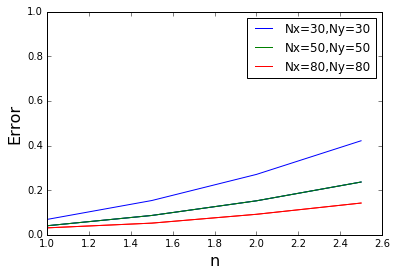

In [161]:
plt.xlabel('n', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.plot(n1,Er1,) 
plt.plot(n2,Er2,)
plt.plot(n3,Er3,)
plt.plot(n2, Er2, 'b', label='Nx=30,Ny=30')
plt.plot(n2, Er2, 'g', label='Nx=50,Ny=50')

plt.plot(n3, Er3, 'r', label='Nx=80,Ny=80')
plt.legend(loc='upper right')
plt.ylim(0, 1.0)


# SOR Method

In [162]:
counter = 0
n=1.0
u=np.zeros((Nx+2,Ny+2),dtype=float)


omega = 1.8
while (counter<5000):
    
    uold = u.copy()
    
    for i in range(1,Nx+1):
        for j in range (1,Ny+1):
            u[i,j]= ((8*(math.pi*math.pi)*(n**2)*(math.cos(2*math.pi*n*xc[i]))*(math.cos(2*math.pi*n*yc[j]))*(dy**2)*(dx**2)+uold[i+1,j]*(dy**2)
                    +u[i-1,j]*(dy**2)+uold[i,j+1]*(dx**2)+u[i,j-1]*(dx**2))/(2*(dx**2+dy**2)))*omega+(1-omega)*uold[i,j]
  
    for j in range(Ny+2):
         u[0,j]= 2*(math.cos(2*math.pi*n*x[1])*(math.cos(2*math.pi*n*yc[j])))-uold[1,j]
    
    for i in range(Nx+2):
        u[i,0]= uold[i,1]-c*dy

    for j in range(Ny+2):
        u[Nx+1,j]= uold[Nx,j]+c*dx
    
    for i in range(Nx+2):
        u[i,Ny+1]= uold[i,Ny]+c*dy
    
    if np.linalg.norm(uold-u)<10**-6:
        break
    

    counter = counter + 1
    
print (counter)


1095


In [163]:
u_an=np.zeros((Nx+2,Ny+2),dtype=float)

for i in range(0,Nx+2):
    for j in range (0,Ny+2):
        u_an[i,j] = math.cos(2*math.pi*n*xc[i])*(math.cos(2*math.pi*n*yc[j]))
        


In [164]:
Er =  (np.linalg.norm(u-u_an))
print (Er)

0.0697442059198


In [165]:
# Nx = 30, Ny = 30
n1 = [1.0,1.5,2.0,2.5]
Er1= [0.069,0.1536,0.2706,0.4213]
convergence1 = [3000,2171,2322,1451]

# Nx = 50, Ny = 50
n2 = [1.0,1.5,2.0,2.5]
Er2= [0.0406,0.0867,0.1523,0.2365]
convergence = [5000,3995,4589,2150]

# Nx = 80, Ny = 80
n3 = [1.0,1.5,2.0,2.5]
Er3= [0.0311,0.0523,0.09187,0.14227]
convergence3 = [1417,5891,7604,3338]

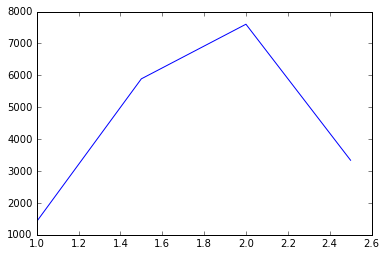

In [166]:
n3 = [1.0,1.5,2.0,2.5]
convergence = [1417,5891,7604,3338]
plt.plot (n3,convergence)

# Grid Refinement Vs Error

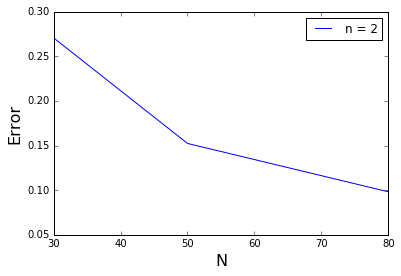

In [167]:
N = [30,50,80]
E = [0.2706,0.15235,0.09816]
plt.xlabel('N', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.plot(N,E, 'b', label='n = 2')
plt.legend(loc='upper right')

# Jacobi Vs SOR

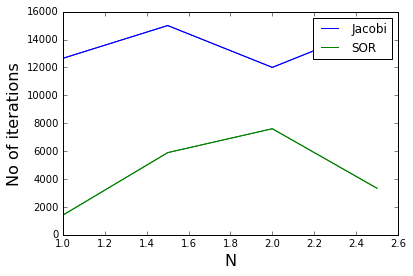

In [168]:
Nx = [1.0,1.5,2.0,2.5]
jc = [12656,15000,12001,15000]
sc = [1417,5891,7604,3338]
plt.plot(Nx,jc,) 
plt.plot(Nx,sc)
plt.plot(Nx, jc, 'b', label='Jacobi')
plt.plot(Nx, sc, 'g', label='SOR')

plt.xlabel('N', fontsize=16)
plt.ylabel('No of iterations', fontsize=16)
plt.legend(loc='upper right')


# Omega Vs Convergence

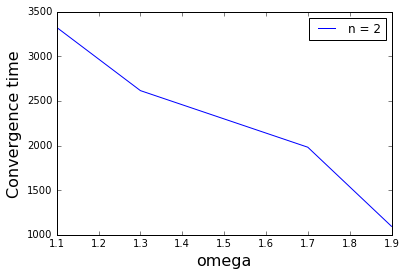

In [169]:
omega = [1.1,1.3,1.7,1.9]
convergence = [3323,2615,1981,1095]
plt.xlabel('omega', fontsize=16)
plt.ylabel('Convergence time', fontsize=16)
plt.plot(omega,convergence, 'b', label='n = 2')
plt.legend(loc='upper right')